# This is a the Test Simulation for MWM 100pc Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
near_north_tab = Table.read('workspace/target_files/100pc/fps_north_100pc.csv')
near_south_tab = Table.read('workspace/target_files/100pc/fps_south_100pc.csv')
near_tab = vstack([near_north_tab,near_south_tab])
near_tab

ra(Gaia),dec(Gaia)
float64,float64
147.255676582,-0.31968359026
147.255676582,-0.31968359026
147.758980414,1.07558474962
150.827682314,-1.08535382584
150.827682314,-1.08535382584
150.770617679,-0.586300748116
150.770617679,-0.586300748116
150.577592325,-0.0695486225203
150.577592325,-0.0695486225203


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


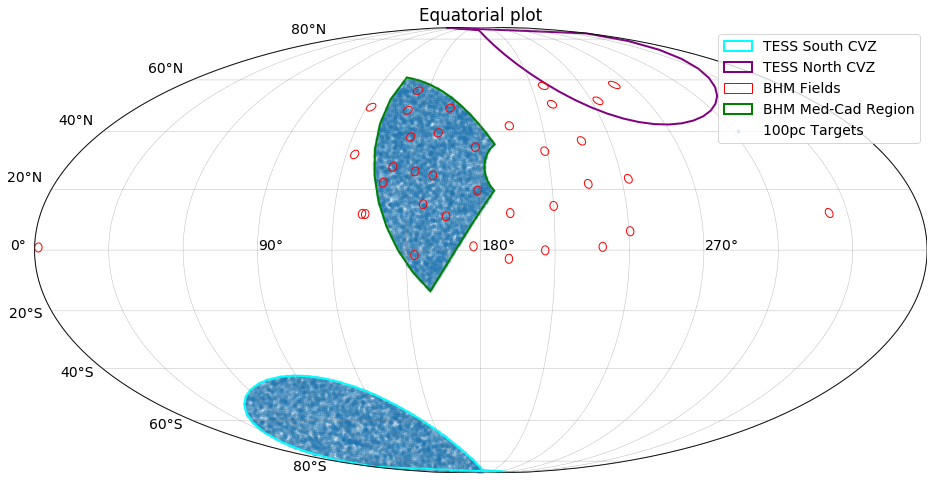

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
x100,y100 = bmap(near_tab['ra(Gaia)'],near_tab['dec(Gaia)'])
bmap.scatter(x100,y100,marker='.',label='100pc Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

## Make 35% of targets "bright"

In [5]:
np.random.seed(123)
cadence_list = list()
for i in range(len(near_tab)):
    if np.random.rand() < .35:
        cadence_list.append('100pcbright')
    else:
        cadence_list.append('100pcdim')

In [6]:
target_tab['ra'] = near_tab['ra(Gaia)']
target_tab['dec'] = near_tab['dec(Gaia)']
target_tab['cadence'] = np.array(cadence_list)
target_tab['type'] = np.repeat('100pc',len(near_tab))
target_tab['priority'] = np.repeat(np.array(35,dtype='int32'),len(near_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(near_tab))

In [7]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str11,str5,int32,float32
147.255676582,-0.31968359026,100pcdim,100pc,35,1.0
147.255676582,-0.31968359026,100pcbright,100pc,35,1.0
147.758980414,1.07558474962,100pcbright,100pc,35,1.0
150.827682314,-1.08535382584,100pcdim,100pc,35,1.0
150.827682314,-1.08535382584,100pcdim,100pc,35,1.0
150.770617679,-0.586300748116,100pcdim,100pc,35,1.0
150.770617679,-0.586300748116,100pcdim,100pc,35,1.0
150.577592325,-0.0695486225203,100pcdim,100pc,35,1.0
150.577592325,-0.0695486225203,100pcdim,100pc,35,1.0


In [8]:
target_tab.write('fps_100pc_target.fits',overwrite=True)

## Create Cadence Table

In [9]:
cadence_tab = Table()

In [10]:
cadence_tab['cadence'] = np.array(['100pcdim','100pcbright'])
cadence_tab['nepochs'] = np.array([1,2],dtype='int32')
cadence_tab['delta'] = np.array([[0,np.nan],[0,180]],dtype='float32')
cadence_tab['softness'] = np.array([[1,np.nan],[1,179]],dtype='float32')
cadence_tab['lunation'] = np.array([[0.35,np.nan],[0.35,1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['boss',np.nan],['boss','apogee']])

In [11]:
cadence_tab

cadence,nepochs,delta [2],softness [2],lunation [2],instrument [2]
str11,int32,float32,float32,float32,str6
100pcdim,1,0.0 .. nan,1.0 .. nan,0.35 .. nan,boss .. nan
100pcbright,2,0.0 .. 180.0,1.0 .. 179.0,0.35 .. 1.0,boss .. apogee


In [12]:
cadence_tab.write('fps_100pc_cadence.fits',overwrite=True)

In [13]:
test =  Table.read('fps_100pc_cadence.fits')
test

cadence,nepochs,delta [2],softness [2],lunation [2],instrument [2]
bytes11,int32,float32,float32,float32,bytes24
100pcdim,1,0.0 .. nan,1.0 .. nan,0.35 .. nan,boss .. nan
100pcbright,2,0.0 .. 180.0,1.0 .. 179.0,0.35 .. 1.0,boss .. apogee
